In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# machine learning packages
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import optuna
from sklearn.model_selection import cross_val_score

set_config(display='diagram', transform_output="pandas")

# Load Dataset¶

In [2]:
file = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/all_variables_6a.csv")
# extract data only for one-hot encoding
data = file.drop(columns=['Lon', 'Lat', 'Borehole'])
data = data.drop('Rech_co_1', axis = 1)
data = data.drop('Rech_co_2', axis = 1)
data = data.drop('RechC_WTF3', axis = 1)
#data = data.drop('RechC_MRC3', axis = 1)
data = data.drop('RechC_WTF3c', axis = 1)
data = data.drop('RechC_MRC3c', axis = 1)
data = data.drop('RechC_4', axis = 1)  
data = data.drop('R_mm_year', axis = 1) 
#data.dropna(inplace=True)
data.head()

,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Slope_30m,Slope_100m,Slope_500m,Slope_5000m,Land_Use_type,Perc_clay,Perc_sand,Perc_silt,Soil_class,RechC_MRC3,slope
0,1069.21100,1085.8702,0.984658,0.748040,91.0,2.928825,5.247280,5.547492,12.647192,243 - Land principally occupied by agriculture...,18.604446,49.043514,32.352036,CAMBISSOLOS,0.479862,1.300978
1,934.68770,1054.0730,0.886739,0.759074,69.0,1.425283,2.207789,4.168107,4.902558,212 - Permanently irrigated land,8.463341,71.482796,20.053864,PODZOIS,0.347334,3.133171
2,895.61194,1063.8200,0.841883,0.761298,93.0,1.655054,3.431121,4.697247,6.386671,312 - Coniferous forest,6.334242,74.322480,19.343277,CAMBISSOLOS,0.455755,4.072707
3,934.68770,1054.0730,0.886739,0.759074,85.0,1.502227,1.738666,4.875282,6.134731,212 - Permanently irrigated land,6.244911,83.027060,10.728027,PODZOIS,0.309669,1.300978
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.178725,NaN


In [3]:
#encode categorical variables
labelencoder = LabelEncoder()
data['land_use_type_cat'] = labelencoder.fit_transform(data['Land_Use_type'])
data['soil_class_cat'] = labelencoder.fit_transform(data['Soil_class'])

# remove categorical variables
data = data.drop('Land_Use_type', axis = 1)
#data = data.drop('soil_class_cat', axis = 1)
#data = data.drop('Elev_m', axis = 1)
data = data.drop('Soil_class', axis = 1)
#data = data.drop('Perc_clay', axis = 1)
#data = data.drop('Perc_sand', axis = 1)
#data = data.drop('Perc_silt', axis = 1)
#data = data.drop('land_use_type_cat', axis = 1)
#data = data.drop('Aridity_idx', axis = 1)   
#data = data.drop('Season_idx', axis = 1)
#data = data.drop(['Precip_mm_year','ETP_mm_year',,'Season_idx'], axis = 1)
data = data.drop('Slope_30m',axis=1)
data = data.drop(['Slope_5000m', 'Slope_500m', 'Slope_100m'], axis = 1)
data = data[data['RechC_MRC3'] > 0.0]
data.dropna(inplace=True)
data

,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Perc_clay,Perc_sand,Perc_silt,RechC_MRC3,slope,land_use_type_cat,soil_class_cat
0,1069.21100,1085.8702,0.984658,0.748040,91.0,18.604446,49.043514,32.352036,0.479862,1.300978,12,0
1,934.68770,1054.0730,0.886739,0.759074,69.0,8.463341,71.482796,20.053864,0.347334,3.133171,5,4
2,895.61194,1063.8200,0.841883,0.761298,93.0,6.334242,74.322480,19.343277,0.455755,4.072707,15,0
3,934.68770,1054.0730,0.886739,0.759074,85.0,6.244911,83.027060,10.728027,0.309669,1.300978,5,4
6,1045.85880,1107.4349,0.944398,0.748662,264.0,12.681211,50.982796,36.335990,0.108520,14.833437,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
134,607.50230,1105.2213,0.549666,0.925135,141.0,21.446953,32.195747,46.357300,0.105604,4.430973,8,3
135,631.99600,1088.2620,0.580739,0.919057,163.0,26.049686,35.114900,38.835415,0.496210,5.364072,8,3
137,571.71100,1130.1387,0.505877,0.930689,97.0,26.848026,34.701523,38.450450,0.820556,2.966687,17,0
138,571.71100,1130.1387,0.505877,0.930689,99.0,26.848026,34.701523,38.450450,0.521299,1.300978,17,0


In [4]:
# Labels are the values we want to predict
y = data['RechC_MRC3']
# Remove the labels from the features
X = data.drop('RechC_MRC3', axis = 1)


# Train and Test Sets¶

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [6]:
rf = RandomForestRegressor(oob_score=True, random_state=42)  ## random_state=0 for reproducible results
#tree.get_params()
rf.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_train = rf.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)
print(mae)
print(mse)
print(rmse)
print(r2)

0.0499495915610326
0.0040591229126419655
0.06371124635919442
0.893242312825057


In [8]:
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

0.10805792929729167
0.018735404271376013
0.13687733293491663
0.35542960567681536


In [34]:
rf = RandomForestRegressor(oob_score=True, random_state=42)
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [70, 100],                                   # Number of trees in the forest
                'max_depth' : [7, 10, 12, 13, 15],                                   # Maximum depth of the tree
                'max_features' : [0.01, 0.1, 0.2, 0.33],                                # Number of features to consider at every split  
                'min_samples_split': [2, 3, 5, 7],                                # Minimum number of samples required to split an internal node
                'min_samples_leaf': [1,2,3,5],                                    # Minimum number of samples required to be at a leaf node
                'bootstrap': [True]                                               # Method of selecting samples for training each tree    
            }

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Step 4: Extract the best parameters and evaluate the model
best_rf_model = grid_search.best_estimator_
# Extracting the best parameters
best_params = grid_search.best_params_

# Predicting on the test set with the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluating the best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)
# Step 6: Evaluate OOB score
oob_score = best_rf_model.oob_score_

mse_best, mae_best, rmse, r2_best, oob_score, best_params

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


C:\Users\35191\.conda\envs\aiml\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


(0.017953411851629027,
 0.10908643707855016,
 0.13399034238193822,
 0.3823331704493217,
 0.23445196065386031,
 {'bootstrap': True,
  'max_depth': 12,
  'max_features': 0.33,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 70})

In [35]:
y_pred_tra = best_rf_model.predict(X_train)
y_pred = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2t = r2_score(y_train, y_pred_tra)

print(f"Best Mean Absolute Error: {mae}")
print(f"Best Mean Squared Error: {mse}")
print(f"Best RMSE: {rmse}")
print(f"Best training R^2: {r2t}")
print(f"Best testing R^2: {r2}")
print(f"OOB Score: {oob_score}")

Best Mean Absolute Error: 0.10908643707855016
Best Mean Squared Error: 0.017953411851629027
Best RMSE: 0.13399034238193822
Best training R^2: 0.8960747388136068
Best testing R^2: 0.3823331704493217
OOB Score: 0.23445196065386031


In [ ]:
Best Mean Absolute Error: 0.10684298505561896
Best Mean Squared Error: 0.016245917024343828
Best RMSE: 0.12745947208561562
Best training R^2: 0.7829177073825497
Best testing R^2: 0.44107759881532804
OOB Score: 0.2594282393727807

'bootstrap': True,
  'max_depth': 10,
  'max_features': 0.33,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 350})

In [9]:
rf = RandomForestRegressor(bootstrap= True, max_depth= 10, max_features=0.33, min_samples_leaf= 2, min_samples_split= 2,
                           n_estimators= 350, oob_score=True, random_state=42)

best_model = rf.fit(X_train, y_train)
oob_score = best_model.oob_score_

In [10]:
y_pred_tra = best_model.predict(X_train)
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2t = r2_score(y_train, y_pred_tra)

print(f"Best Mean Absolute Error: {mae}")
print(f"Best Mean Squared Error: {mse}")
print(f"Best RMSE: {rmse}")
print(f"Best training R^2: {r2t}")
print(f"Best testing R^2: {r2}")
print(f"OOB Score: {oob_score}")

Best Mean Absolute Error: 0.10684298505561896
Best Mean Squared Error: 0.016245917024343828
Best RMSE: 0.12745947208561562
Best training R^2: 0.7829177073825497
Best testing R^2: 0.44107759881532804
OOB Score: 0.2594282393727807


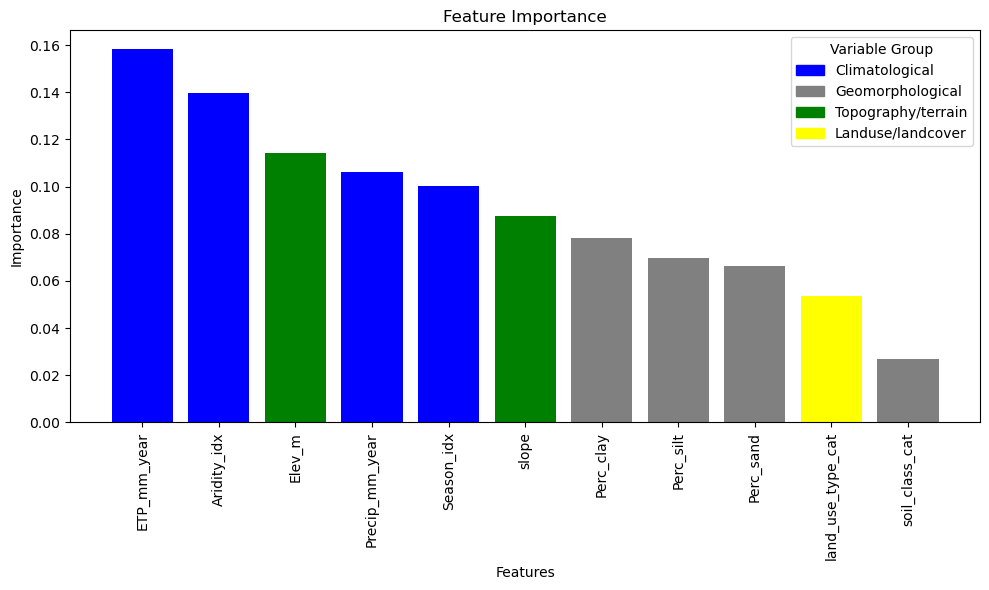

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
# Assuming `best_model` is your trained RandomForestRegressor from GridSearchCV
feature_list = list(X.columns)
# Extract feature importances
importances = best_model.feature_importances_

# Sort feature importances in descending order (optional)
indices = np.argsort(importances)[::-1]

# Get the sorted feature names
sorted_feature_names = [feature_list[i] for i in indices]

# Define the colors: First four features blue, others use a colormap
colors = ['blue' if i in [0,1,3,4] else 
          'green' if i in [2,5] else 
          'grey' if i in [6,7,8, 10] else
          'yellow' if i == 9 else
          plt.cm.viridis((i - 4) / (len(importances) - 4)) for i in range(len(importances))]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], color=colors, align="center")
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()

# Create custom legend handles
blue_patch = mpatches.Patch(color='blue', label='Climatological')
grey_patch = mpatches.Patch(color='grey', label='Geomorphological')
green_patch = mpatches.Patch(color='green', label='Topography/terrain')
yellow_patch = mpatches.Patch(color='yellow', label='Landuse/landcover')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.legend(handles=[blue_patch, grey_patch, green_patch, yellow_patch], title='Variable Group', loc='upper right')
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/RF_MRC3_FIm.png', format='png', dpi=3000)
plt.show()

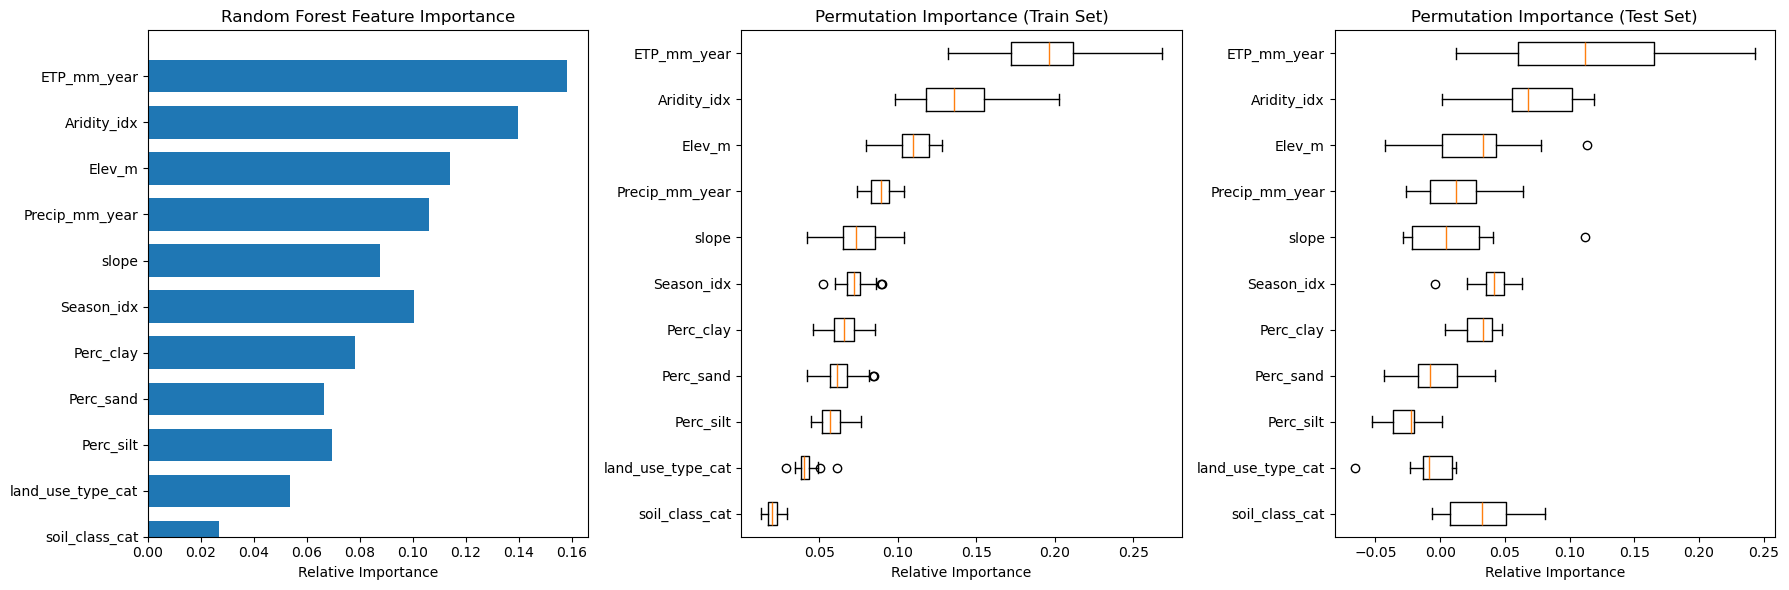

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Compute permutation importance on training set
result_train = permutation_importance(
    best_model, X_train, y_train, n_repeats=30, random_state=42
)
perm_sorted_idx = result_train.importances_mean.argsort()

# Compute permutation importance on test set
result_test = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42
)

# Reorder features according to permutation importance from the training set
ordered_feature_names = np.array(feature_list)[perm_sorted_idx]
ordered_tree_importances = best_model.feature_importances_[perm_sorted_idx]
ordered_train_importances = result_train.importances[perm_sorted_idx]
ordered_test_importances = result_test.importances[perm_sorted_idx]

# Plotting the feature importances
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot Random Forest feature importance in the same order
ax1.barh(
    np.arange(len(ordered_feature_names)),
    ordered_tree_importances,
    height=0.7
)
ax1.set_title('Random Forest Feature Importance')
ax1.set_xlabel('Relative Importance')
ax1.set_yticks(np.arange(len(ordered_feature_names)))
ax1.set_yticklabels(ordered_feature_names)
ax1.set_ylim((0, len(ordered_feature_names)))

# Plot Permutation importance (training set)
ax2.boxplot(
    ordered_train_importances.T, vert=False,
    labels=ordered_feature_names
)
ax2.set_title('Permutation Importance (Train Set)')
ax2.set_xlabel('Relative Importance')

# Plot Permutation importance (test set)
ax3.boxplot(
    ordered_test_importances.T, vert=False,
    labels=ordered_feature_names
)
ax3.set_title('Permutation Importance (Test Set)')
ax3.set_xlabel('Relative Importance')

# Adjust layout and display
fig.tight_layout()
#plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/RF_MRC3_FIM.png', format='png', dpi=3000)
plt.show()


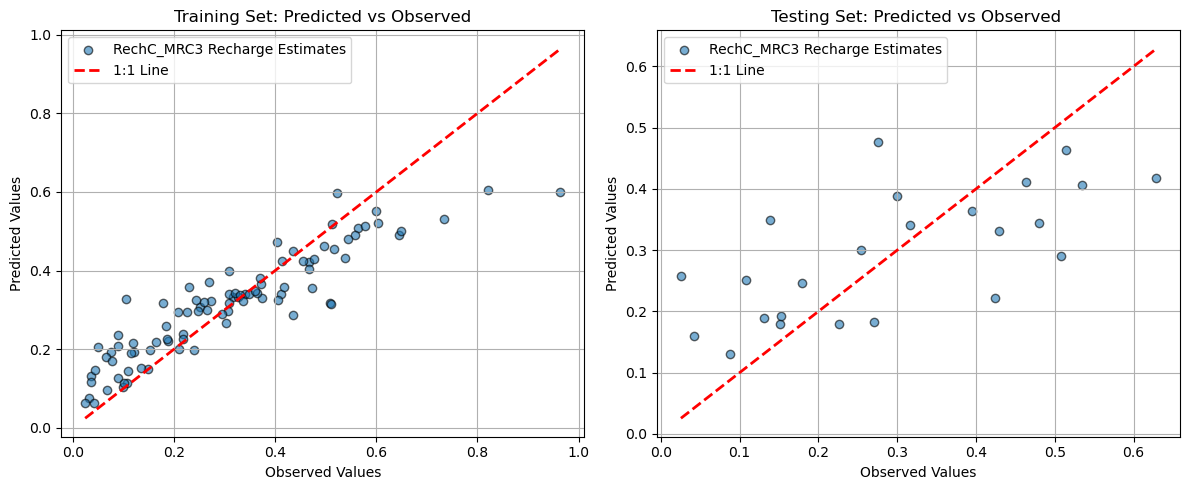

In [31]:
# Plot predicted vs. observed for training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_tra, alpha=0.6, edgecolor='k', label='RechC_MRC3 Recharge Estimates')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2, label='1:1 Line')
plt.title('Training Set: Predicted vs Observed')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()

# Plot predicted vs. observed for testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', label='RechC_MRC3 Recharge Estimates')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='1:1 Line')
plt.title('Testing Set: Predicted vs Observed ')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()

plt.tight_layout()
#plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/RF_MRC3_1_1plot.png', format='png', dpi=3000)
plt.show()

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_predictors = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/recharge_0_1R.csv")
df_predictors=df_predictors.drop(['Longitude', 'Latitude'], axis=1)
df_predictors

,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Perc_clay,Perc_sand,Perc_silt,slope,Land_use_type,soil_classifcation
0,1520.81970,1097.27150,1.39,0.726971,127,7.437875,70.140280,22.421844,29.160498,313 - Mixed forest,CAMBISSOLOS
1,1684.09960,942.61523,1.79,0.731595,417,7.099144,73.213930,19.686928,21.082275,324 - Transitional woodland-shrub,CAMBISSOLOS
2,1700.74830,988.79970,1.72,0.733027,127,10.497067,62.667980,26.834953,11.191440,312 - Coniferous forest,CAMBISSOLOS
3,1726.83470,1002.00214,1.72,0.732566,263,7.358498,73.061890,19.579613,38.680870,324 - Transitional woodland-shrub,CAMBISSOLOS
4,1867.03500,912.36650,2.05,0.729969,1047,10.287284,71.938774,17.773941,22.638521,322 - Moors and heathland,CAMBISSOLOS
...,...,...,...,...,...,...,...,...,...,...,...
908,605.68340,1103.39640,0.55,0.916357,50,21.485680,46.858340,31.655975,2.097765,242 - Complex cultivation patterns,CAMBISSOLOS
909,622.84784,1092.93030,0.57,0.918420,89,27.789463,30.833832,41.376705,2.909076,241 - Annual crops associated with permanent c...,LUVISSOLOS
910,631.99600,1088.26200,0.58,0.919057,190,28.379148,30.757843,40.863007,14.011967,223 - Olive groves,LUVISSOLOS
911,607.50230,1105.22130,0.55,0.925135,64,22.191051,33.062866,44.746082,3.679723,243 - Land principally occupied by agriculture...,CAMBISSOLOS


In [59]:
labelencoder = LabelEncoder()
df_predictors['land_use_type_cat'] = labelencoder.fit_transform(df_predictors['Land_use_type'])
df_predictors['soil_class_cat'] = labelencoder.fit_transform(df_predictors['soil_classifcation'])

# remove categorical variables
df_predictors = df_predictors.drop('Land_use_type', axis = 1)
df_predictors= df_predictors.drop('soil_classifcation', axis = 1)
df_predictors

,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Perc_clay,Perc_sand,Perc_silt,slope,land_use_type_cat,soil_class_cat
0,1520.81970,1097.27150,1.39,0.726971,127,7.437875,70.140280,22.421844,29.160498,20,0
1,1684.09960,942.61523,1.79,0.731595,417,7.099144,73.213930,19.686928,21.082275,24,0
2,1700.74830,988.79970,1.72,0.733027,127,10.497067,62.667980,26.834953,11.191440,19,0
3,1726.83470,1002.00214,1.72,0.732566,263,7.358498,73.061890,19.579613,38.680870,24,0
4,1867.03500,912.36650,2.05,0.729969,1047,10.287284,71.938774,17.773941,22.638521,22,0
...,...,...,...,...,...,...,...,...,...,...,...
908,605.68340,1103.39640,0.55,0.916357,50,21.485680,46.858340,31.655975,2.097765,15,0
909,622.84784,1092.93030,0.57,0.918420,89,27.789463,30.833832,41.376705,2.909076,14,3
910,631.99600,1088.26200,0.58,0.919057,190,28.379148,30.757843,40.863007,14.011967,12,3
911,607.50230,1105.22130,0.55,0.925135,64,22.191051,33.062866,44.746082,3.679723,16,0


In [60]:
rf = RandomForestRegressor(bootstrap= True, max_depth= 10, max_features=0.33, min_samples_leaf= 2, min_samples_split= 2,
                           n_estimators= 350, oob_score=True, random_state=42)

best_model = rf.fit(X_train, y_train)
oob_score = best_model.oob_score_

In [61]:
y_pred_tra = best_model.predict(X_train)
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2t = r2_score(y_train, y_pred_tra)

print(f"Best Mean Absolute Error: {mae}")
print(f"Best Mean Squared Error: {mse}")
print(f"Best RMSE: {rmse}")
print(f"Best training R^2: {r2t}")
print(f"Best testing R^2: {r2}")
print(f"OOB Score: {oob_score}")

Best Mean Absolute Error: 0.10684298505561896
Best Mean Squared Error: 0.016245917024343828
Best RMSE: 0.12745947208561562
Best training R^2: 0.7829177073825497
Best testing R^2: 0.44107759881532804
OOB Score: 0.2594282393727807


In [63]:
df_predictors['predicted_rech_co'] = best_model.predict(df_predictors[['Precip_mm_year','ETP_mm_year','Aridity_idx','Season_idx','Elev_m',
                                                                       'Perc_clay',	'Perc_sand','Perc_silt','slope',
                                                                       'land_use_type_cat',	'soil_class_cat']])


In [64]:
df_predictors

,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Perc_clay,Perc_sand,Perc_silt,slope,land_use_type_cat,soil_class_cat,predicted_rech_co
0,1520.81970,1097.27150,1.39,0.726971,127,7.437875,70.140280,22.421844,29.160498,20,0,0.273294
1,1684.09960,942.61523,1.79,0.731595,417,7.099144,73.213930,19.686928,21.082275,24,0,0.273270
2,1700.74830,988.79970,1.72,0.733027,127,10.497067,62.667980,26.834953,11.191440,19,0,0.328514
3,1726.83470,1002.00214,1.72,0.732566,263,7.358498,73.061890,19.579613,38.680870,24,0,0.270339
4,1867.03500,912.36650,2.05,0.729969,1047,10.287284,71.938774,17.773941,22.638521,22,0,0.291928
...,...,...,...,...,...,...,...,...,...,...,...,...
908,605.68340,1103.39640,0.55,0.916357,50,21.485680,46.858340,31.655975,2.097765,15,0,0.420540
909,622.84784,1092.93030,0.57,0.918420,89,27.789463,30.833832,41.376705,2.909076,14,3,0.461687
910,631.99600,1088.26200,0.58,0.919057,190,28.379148,30.757843,40.863007,14.011967,12,3,0.382967
911,607.50230,1105.22130,0.55,0.925135,64,22.191051,33.062866,44.746082,3.679723,16,0,0.437253


In [65]:
df_predictors.to_csv('C:/Users/35191/Desktop/ThesisData/piezometers/Pred_recharge_0_1R.csv')